In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [32]:
df= pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### Understand the data¶


In [33]:
df.shape

(607, 12)

In [34]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [36]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [37]:
df['work_year'].value_counts()

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

In [38]:
filtered_df_2020 = df.query("work_year == 2020")


average_salary_2020 = filtered_df_2020['salary_in_usd'].mean()

print("Average salary in 2020:", average_salary_2020)

Average salary in 2020: 95813.0


In [39]:
filtered_df_2021 = df.query("work_year == 2021")



average_salary_2021 = filtered_df_2021['salary_in_usd'].mean()

print("Average salary in 2021:", average_salary_2021)

Average salary in 2021: 99853.79262672811


In [40]:
filtered_df_2022 = df.query("work_year == 2022")



average_salary_2022 = filtered_df_2022['salary_in_usd'].mean()

print("Average salary in 2022:", average_salary_2022)

Average salary in 2022: 124522.00628930818


### EDA

In [41]:
cat_col= [i for i in df if df[i].dtype=='O']
cat_col


['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [42]:
print(f"No. of categorical Columns:{len(cat_col)}")

No. of categorical Columns:7


In [43]:
num_col= [ i for i in df if df[i].dtype!="O"]
num_col

['Unnamed: 0', 'work_year', 'salary', 'salary_in_usd', 'remote_ratio']

In [44]:
print(f"No. of numerical Columns:{len(num_col)}")

No. of numerical Columns:5


In [45]:
for i in range(2020,2023):
 df1=df.query("work_year==@i")
 avrage=df1["salary_in_usd"].mean()
 print( f"avrage salary of {i}: {avrage}")

avrage salary of 2020: 95813.0
avrage salary of 2021: 99853.79262672811
avrage salary of 2022: 124522.00628930818


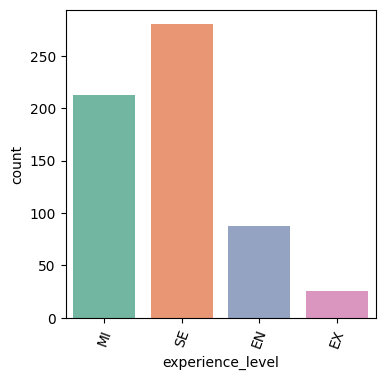

In [61]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='experience_level', palette="Set2")
plt.xticks(rotation=70)
plt.show()


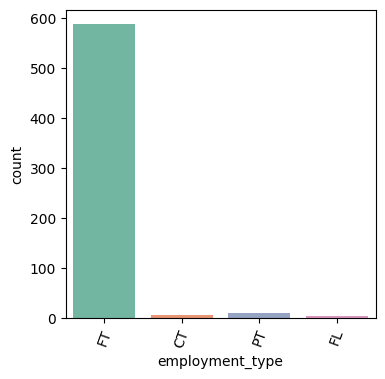

In [62]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='employment_type', palette="Set2")
plt.xticks(rotation=70)
plt.show()

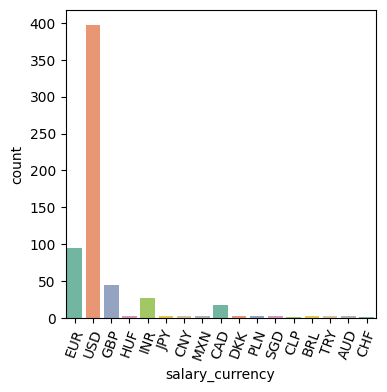

In [63]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='salary_currency', palette="Set2")
plt.xticks(rotation=70)
plt.show()

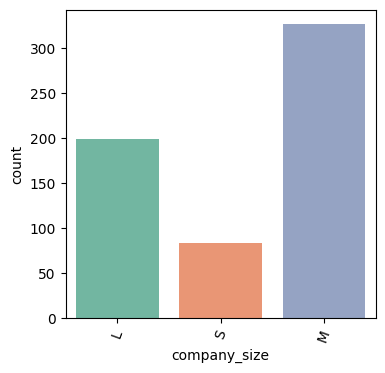

In [64]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='company_size', palette="Set2")
plt.xticks(rotation=70)
plt.show()

<Axes: >

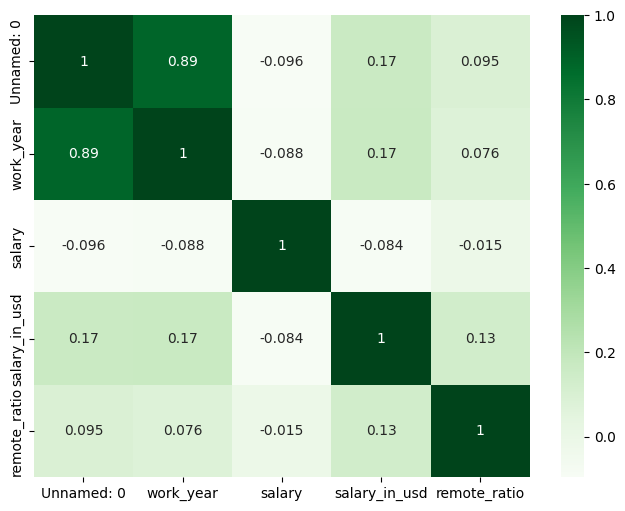

In [69]:
cat_col_corr=df.drop(cat_col,axis=1).corr()
plt.figure(figsize=(8,6))
sns.heatmap(cat_col_corr,cmap='Greens',annot=True)

In [73]:
work_year= df['work_year'].value_counts()
work_year

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

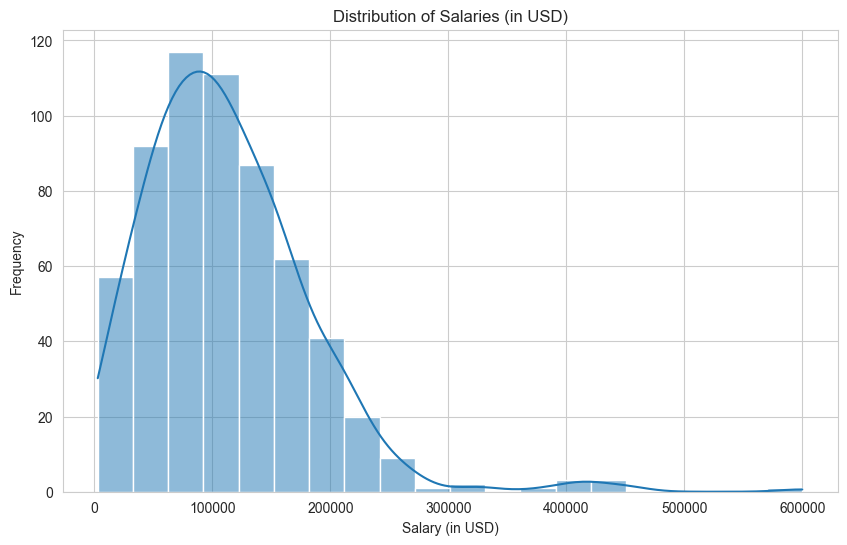

In [80]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=20, kde=True, palette="Set2")
plt.title('Distribution of Salaries (in USD)')
plt.xlabel('Salary (in USD)')
plt.ylabel('Frequency')
plt.show()

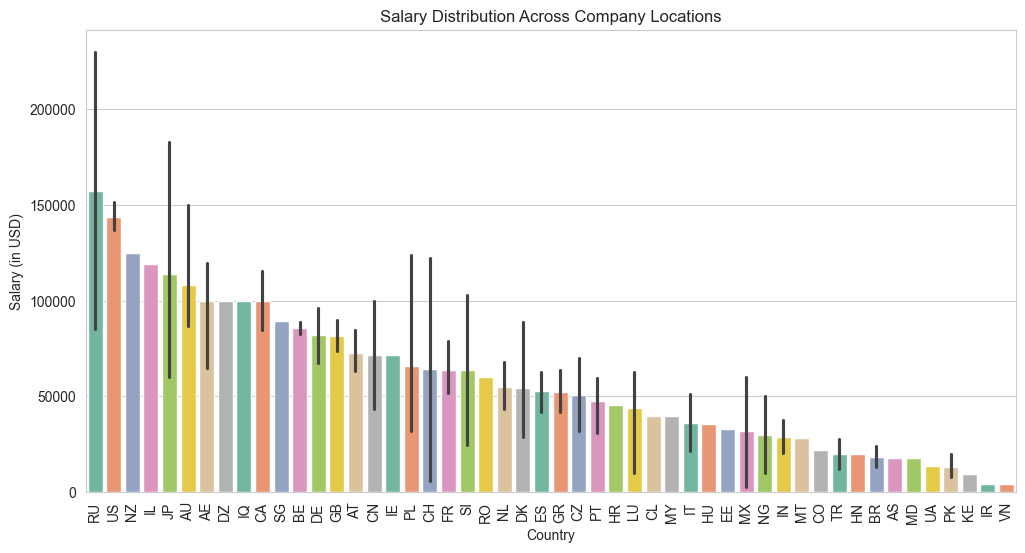

In [81]:
sorted_countries = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.barplot(x='company_location', y='salary_in_usd', data=df, order=sorted_countries, palette="Set2")
plt.title('Salary Distribution Across Company Locations')
plt.xlabel('Country')
plt.ylabel('Salary (in USD)')
plt.xticks(rotation=90)
plt.show()

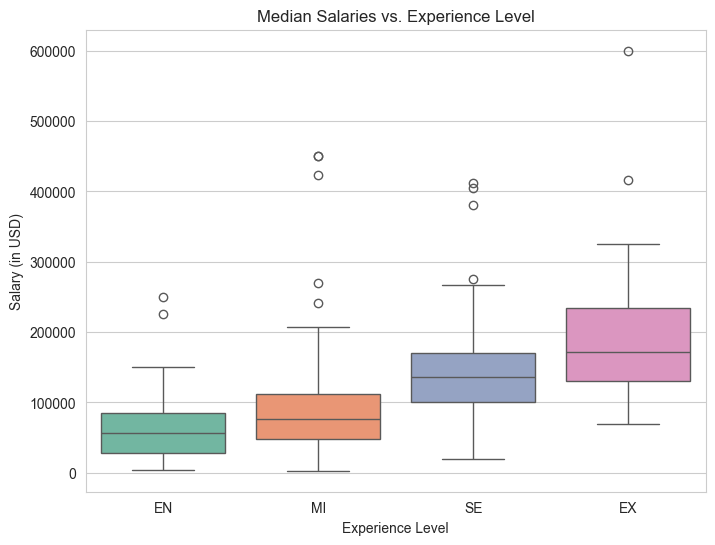

In [83]:
sorted_exp = ['EN', 'MI', 'SE', 'EX'] 
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', order=sorted_exp,palette="Set2")
plt.title('Median Salaries vs. Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')
plt.show()